Redes neurais artificiais
=========================



## Introdução



Nossa classe `Valor` já faz tudo que precisamos para usarmos ela como suporte para construirmos uma rede neural. Neste notebook iremos construir uma rede neural por partes, primeiramente criando um neurônio artificial, depois uma camada de neurônios e, por fim, uma rede neural multicamadas.



## Objetivo



Criar uma rede neural artificial usando Python.



## Importações



In [1]:
import random
from classes import Valor
from funcoes import plota_grafo

## Código e discussão



### O neurônio artificial



Vamos construir um neurônio artificial. Como iremos ter vários neurônios em uma rede neural, podemos construir uma classe que servirá de receita para criar esses neurônios. Lembre-se que um neurônio artificial recebe informação de sinapses artificiais ponderadas, soma estas informações, adiciona um viés à esta soma, aplica uma função de ativação e, finalmente, passa a informação adiante.



In [2]:
class Neuronio:
    def __init__(self, num_dados_entrada):
        pesos = []

        for _ in range(num_dados_entrada):
            peso = Valor(random.uniform(-1, 1))  # cada vez que um neurônio é gerado, ele sempre será diferente
            pesos.append(peso)

        self.pesos = pesos
        self.vies = Valor(random.uniform(-1, 1))

    def __call__(self, x):
        """Executa a computação interna do neurônio.

        Args:
          x: lista de valores de entrada (informação que chega ao neurônio).

        Returns:
          Informação que o neurônio propaga adiante. Trata-se da
          aplicação da função de ativação à soma de `x` vezes os pesos do
          neurônio adicionado ao viés.
        """
        assert len(x) == len(self.pesos), "Seu x tem tamanho errado."
        
        soma = 0
        for x_, p in zip(x, self.pesos):
            soma = soma + x_ * p
            
        soma = soma + self.vies
        dado_de_saida = soma.sig()   # .sig() pertence à classe Valor
        
        return dado_de_saida

<font color='lightseagreen'> Essa classe armazena informações importantes para criar um neurônio para a nossa rede neural. Podemos ver nela que, dentro da função dunder de ativação `__call__`, há um nome sendo definido como <u>dados_de_saida = soma.sig()</u>, no qual `.sig()` é uma das funções não dunder que criamos dentro da nossa classe `Valor` no experimento anterior. Aqui, ela está aplicanfo uma sigmoide à soma de todos os valores que temos de informação neuronal que será propagada adiante, calculada pela soma dos valores anteriores (soma) mais os valores de entrada (x_), vezes os pesos desses valores, adicionado ao viés do valor de entrada. </font>

Vamos fazer um teste simples do nosso neurônio artificial.



In [3]:
dados_de_entrada = [2.5, 4.25]

meu_neuronio = Neuronio(len(dados_de_entrada))

print(meu_neuronio(dados_de_entrada))  # fazendo os dados de entrada passar pela função __call__

Valor(data=0.00805100482866027)


<font color='lightseagreen'> Como podemos perceber, a cada vez que rodamos a célula acima, recebemos um valor diferente, ou seja, temos sempre um novo neurônio sendo criado. Isso acontece porque o código é apenas reponsável por criar um neurônio randomicamente. <font>

### A camada de neurônios



Uma rede neural artificial com apenas um neurônio é um modelo relativamente simples. As redes neurais artificias costumam ser mais interessantes com mais neurônios. O motivo para isso é que com mais neurônios nós conseguimos identificar padrões mais complexos nos dados na tentativa de induzir um modelo preditivo melhor.

Uma estrutura de organização de neurônios artificiais são as `camadas de neurônios`. Uma camada de neurônio é um conjunto de neurônios onde cada neurônio é independente (tem seu próprio conjunto de pesos e viés), porém recebe a mesma informação. A quantidade de informação recebida estará representada no argumento `num_dados_entrada` abaixo. Assim como o neurônio artificial, uma camada de neurônios será modelada usando uma classe.



In [4]:
class Camada:
    def __init__(self, num_dados_entrada, num_neuronios):
        neuronios = []

        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada)
            neuronios.append(neuronio)

        self.neuronios = neuronios

    def __call__(self, x):
        """Executa a computação de cada neurônio da camada.

        Args:
          x: lista de valores de entrada (informação que chega aos neurônios).

        Returns:
          Informação que os neurônios da camada propagam adiante.
        """
        saidas = []

        for neuronio in self.neuronios:
            informacao = neuronio(x)
            saidas.append(informacao)

        if len(saidas) == 1: # se tiver apenas um item da lista
            return saidas[0] # arranca ele da lista
        else:
            return saidas

Vamos fazer um teste simples da nossa camada de neurônios artificiais.



In [5]:
dados_de_entrada = [2.5, 4.25]
num_neuronios = 3

minha_camada = Camada(len(dados_de_entrada), num_neuronios)

print(minha_camada(dados_de_entrada))  # retorna uma lista com a quantidade de neurônios dados na camada

[Valor(data=0.9642312344925413), Valor(data=0.9867961619704069), Valor(data=0.018683989951746655)]


<font color='lightseagreen'> Da mesma forma que anteriormente, rodar o código várias vezes não vai fazer nada mais do que criar novas camadas de neurônios totalmente diferentes, pois são geradas aleatoriamente. </font>

### A rede neural Multilayer Perceptron (MLP)



Uma rede neural artificial composta de uma ou mais camadas ocultas de neurônios (isto é, camadas que não sejam camadas de entrada ou camadas de saída) é chamada de Multilayer Perceptron ou simplesmente `MLP`.

A informação em uma rede MLP flui da esquerda para a direita, iniciando na camada de entrada, passando por todas as camadas ocultas (uma a uma, na ordem) e saindo na camada de saída. A informação em uma MLP nunca retorna, apenas segue em frente. Por conta disso, MLPs também são chamadas de `feedforward networks`, ou seja, redes neurais que sempre propagam &ldquo;para frente&rdquo; a informação. Existem outros tipos de redes neurais que não são `feedforward`, porém estas não serão vistas neste curso.

Como você provavelmente já estava esperando, usaremos uma classe para servir como receita para criar nossas redes MLP.



<font color='lightseagreen'> Multilayer Perceptrons possuem pelo menos uma camada oculta, que seria a camada do meio. Enquanto isso, a primeira e a última são chamadas de camadas de entrada e de saída, respectivamente. </font>

In [6]:
class MLP:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):

        percurso = [num_dados_entrada] + num_neuronios_por_camada # números de neurônios por camada que não seja a de entrada
        camadas = []

        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(percurso[i], percurso[i+1])
            camadas.append(camada)

        self.camadas = camadas

    def __call__(self, x):
        """Executa a computação de cada camada.

        Como a rede MLP é uma rede feedforward, a informação que uma camada
        recebe é a informação de saída da camada anterior. A única exceção é a
        camada de entrada, onde a informação é fornecida pelo usuário

        Args:
          x: informação fornecida na camada de entrada.

        Returns:
          Informação recuperada na camada de saída.
        """
        for camada in self.camadas:
            x = camada(x)
        return x

Vamos fazer um teste simples da nossa rede MLP.



In [7]:
dados_de_entrada = [2.5, 4.25]
num_neuronios_por_camada = [3, 2, 1]

minha_mlp = MLP(len(dados_de_entrada), num_neuronios_por_camada)

resultado = minha_mlp(dados_de_entrada)

print(resultado)

Valor(data=0.2506460369152116)


<font color='lightseagreen'> Esse valor não tem significado, pois não treinamos uma rede ainda. Sendo assim, o valor retornado acima não está treinado e a cada vez que o código é rodado, estaremos apenas criando uma rede diferente. </font>

Observe que nosso `resultado` é uma instância da classe `Valor`! O que nós podemos fazer com instâncias desta classe? Sim, podemos computar o gradiente local usando nosso algoritmo de `autograd` e plotar o grafo computacional!!



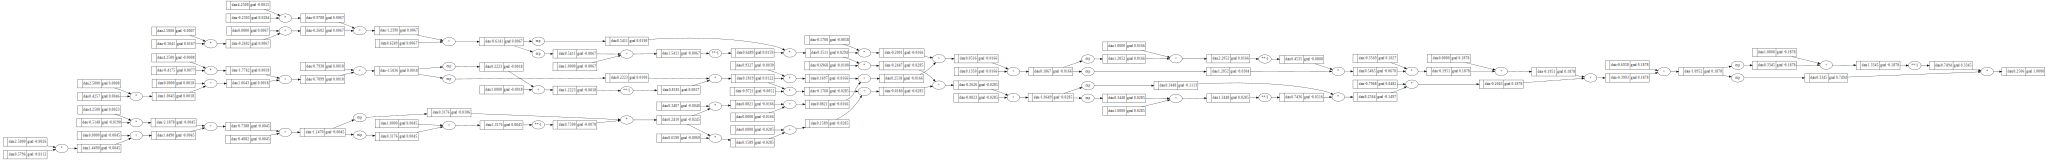

In [8]:
resultado.propagar_tudo()
grafo = plota_grafo(resultado)

# para salvar o grafo
grafo.render("rede_neural", format="png")

grafo

## Conclusão



Após concluir a classe `Valor`, a qual agora já faz tudo o que precisaremos para funcionar e sustentar nossa rede neural, o que procuramos agora é construir a nossa rede neural completa. Para isso, estamos aqui, neste notebook R.06, montando uma rede neural parte por parte, de forma que cada parte criada é uma classe que armazena informações que seão responsáveis por criar e fazer funcionar os elementos que compõem uma rede artificial: o neurônio, a camada e uma rede de multicamadas. Essa construção serve também para entendermos como funciona uma rede neural artificial, de maneira pausada e aos poucos.

Sendo assim, importando a classe `Valor`do script `classes.py`, pudemos construir três novas classes chamadas:

<ul>
    <li> <b>Neuronio:</b> receita para criar um neurônio que irá compor a rede neural artificial. </li>
    <li> <b>Camada:</b> receita que monta uma estrutura de neurônios em camada. </li>
    <li> <b>MLP (Multilayer Perceptron):</b> receita para organizar um conjunto de camadas que propagam as informações recebidas por cada neurônio. </li>
</ul>

Percebemos que cada uma dessas classes é importante, uma vez que para possuir uma rede de multicamadas, precisamos ter camadas sendo contruídas, que por sua vez precisam de neurônios construídos. Por esse motivo temos `loops` de for sendo feitos em cada uma das classes, dentro uma função dunder chamada `__call__`. Essa nova função definida nas classes desse experimento é responsável por computar os objetos de forma a convertê-los em objetos chamáveis, como funções, de forma a executar o código associado à esse objeto. Desta forma, então, conseguimos executar o código que cria o neurônio ao criar uma camada, que será executada pela `__call__` da receita que cria a rede multicamadas.

O resultado final da nossa rede artificial pode ser visto no grafo plotado pelo algoritmo do `autograd`.

## Playground

